<a href="https://colab.research.google.com/github/Chris21-lkb/NLP_deep_learning_classification/blob/main/Introduction_to_nlp_in_tensorflow_video_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals in tensorflow

NLP has the goal of deriving information out of natural language (could be sequences test or speech)

Another common term for NLP problems is sequence to sequence (seq2seq)

## Check for GPU


In [ ]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-fa439c00-da73-578c-b971-406045902066)


## Get helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-12-06 09:31:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-06 09:31:47 (75.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we're going to use is Kaggle's introduction to NLP dataset (text samples of tweets labelled as diaster or not diaster

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2021-12-06 09:31:55--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2021-12-06 09:31:56 (131 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
# Import some functions
from helper_functions import unzip_data, create_tensorboard_callback, compare_historys, plot_loss_curves

In [ ]:
# Unzip data
unzip_data("nlp_getting_started.zip")

## Visualizing a text dataset

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [ ]:
# Shuffle training dataframe to only use 10% of dataset
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test dataframes look like ?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class ?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# How many total samples ?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real diaster)" if target > 0 else "(not real diaster)")
  print(f"Text:\n{text}\n")
  print(f"---\n")

Target: 0 (not real diaster)
Text:
If you don't have anything nice to say you can come sit with me.

---

Target: 1 (real diaster)
Text:
Sinking ships burning buildings &amp; Falling objects are what reminds me of the old us.

---

Target: 1 (real diaster)
Text:
I'm in utter shock and devastation you don't go to work to be left feeling how I do now. Life really is too short ??

---

Target: 0 (not real diaster)
Text:
I need a spot w| some drink specials. I'm kinda tired of the epicentre

---

Target: 1 (real diaster)
Text:
Man! What I would give to be in CA right now to help with the wild fires.

---



## Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                           train_df_shuffled["target"].to_numpy(),
                                                                           test_size = 0.1,
                                                                           random_state = 42)

In [ ]:
# Check the lenghts
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

When dealing with a text problem, one of the first thing you will have to do before you can build a model is to convert your text to numbers.

There are a few ways to do this, namely :

* Tokenization-direct mapping of token (a token could be a word or a character) to number
* Embedding-create a matrix of feature vector of each token (the size of the feature vector can be defined and this embedding can be learned)

### Text vectorization (tokenization)

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens = None, # How many words in the vocabulary
                                    standardize = "lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams = None,
                                    output_mode = "int",
                                    output_sequence_length = None,
                                    pad_to_max_tokens = None)  

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length = max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 @USATODAY.  PRAYING FOR GOD'S HEALING AND SAFETY OF FIRST RESPONDERS        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1453, 9622,   10, 1846, 5499,    7,  992,    6,   97,  500,    0,
           0,    0,    0,    0]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in our training data
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 Least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 Least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding Layer

To make our embedding, we are going to use TensorFlow's embedding layer:     

The parameters we care most about for our embedding layer:     
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector
* `input_put` = length of the sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)

embedding

In [ ]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nEmbedded version:")

# Embed the random sentence (turn it into dense vectors of fixedd size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 The Art World's Seismic Shift Back to the Oddball - Observer http://t.co/W0xR5gP8cW        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03482765,  0.03640476,  0.02388134, ..., -0.00504541,
         -0.00374978, -0.01217508],
        [-0.03481416, -0.00043206,  0.01639137, ..., -0.04875579,
          0.0257542 , -0.00995066],
        [-0.02252007, -0.00115206,  0.0277958 , ...,  0.00890305,
         -0.01293681,  0.02934499],
        ...,
        [-0.03713559,  0.03069374,  0.01079207, ...,  0.03688412,
         -0.02218246,  0.0490723 ],
        [-0.03713559,  0.03069374,  0.01079207, ...,  0.03688412,
         -0.02218246,  0.0490723 ],
        [-0.03713559,  0.03069374,  0.01079207, ...,  0.03688412,
         -0.02218246,  0.0490723 ]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.03482765,  0.03640476,  0.02388134, -0.03664297,  0.03521248,
         0.02407641, -0.04398615, -0.01001619,  0.00082858,  0.04553724,
         0.01369676, -0.00419337, -0.03113159, -0.03173997, -0.00326561,
        -0.03950233, -0.01838641, -0.03816625, -0.04612654,  0.00311204,
         0.00294235, -0.03693663, -0.04341772,  0.01466086,  0.02132526,
        -0.04593667,  0.03594834, -0.01761513, -0.0377254 , -0.03473306,
        -0.02303696, -0.03664011, -0.04803853,  0.00124636,  0.04097405,
         0.0425634 ,  0.04301291,  0.04367243, -0.04118509,  0.00940648,
        -0.02008694, -0.04897304, -0.01798322, -0.02854349,  0.01904864,
         0.02410441,  0.00091546, -0.00424447,  0.00870284, -0.01111538,
        -0.04413083, -0.04301064, -0.02023051, -0.03991393,  0.01401393,
        -0.0368229 , -0.01204554,  0.03052263, -0.03189615, -0.03965177,
        -0.03634731, -0.03945325, -0.02776499,  0.04119081,  0.04847152,
  

## Modelling a text dataset (running a series of experiments)

Now we have a got way to turn our text sequences into numbers, it is time to start building a series of modelling experiments.

We'll start with a baseline and move on from there.

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LST, model (RNN)
* Model 3: GRU model (RNN )
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (Using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data


### Model 0: Getting a baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # Convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)

In [ ]:
print(f"Our baseline model achieves an accuracy of : {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of : 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):

  model_accuracy =  accuracy_score(y_true, y_pred) * 100

  model_precision, model_recall, model_f1, _, = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 1

In [ ]:
# Create a tensorboard callback
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_1_history = model_1.fit(x = train_sentences,
                              y = train_labels,
                              epochs =5 ,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20211206-094320
Epoch 1/5
215/215 [==============================] - 3s 5ms/step - loss: 0.6130 - accuracy: 0.6871 - val_loss: 0.5382 - val_accuracy: 0.7480
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4423 - accuracy: 0.8189 - val_loss: 0.4680 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3475 - accuracy: 0.8626 - val_loss: 0.4550 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2841 - accuracy: 0.8895 - val_loss: 0.4672 - val_accuracy: 0.7953
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.2381 - accuracy: 0.9118 - val_loss: 0.4812 - val_accuracy: 0.7900


In [ ]:
# Check the results 
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.7900


[0.48122915625572205, 0.7900262475013733]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [ ]:
model_1_pred_probs[0]

array([0.36663285], dtype=float32)

In [ ]:
# Look at the first 10 predictions
model_1_pred_probs[:10]

array([[0.36663285],
       [0.78472865],
       [0.9969386 ],
       [0.10839347],
       [0.11077886],
       [0.9437826 ],
       [0.8961924 ],
       [0.9934036 ],
       [0.9620472 ],
       [0.25279933]], dtype=float32)

In [ ]:
val_labels

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))

In [ ]:
model_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [ ]:
# Calculate our modl results
model_1_results = calculate_results(val_labels, model_1_preds)

In [ ]:
model_1_results

{'accuracy': 79.00262467191601,
 'f1': 0.7864703323847969,
 'precision': 0.7969833282849871,
 'recall': 0.7900262467191601}

In [ ]:
import numpy as np

np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False,  True])

## Recurrent Neural Network (RNN's)

RNN's are useful for sequence data.

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input

### Model 2: LSTM

LSTM = long short term memory (one of the most popular LSTM cells)

our structure of an RNN typically looks like this:

`Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)`

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [ ]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20211206-094459
Epoch 1/5
215/215 [==============================] - 5s 8ms/step - loss: 0.2235 - accuracy: 0.9216 - val_loss: 0.5474 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1587 - accuracy: 0.9429 - val_loss: 0.5733 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.1293 - accuracy: 0.9533 - val_loss: 0.6770 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.1049 - accuracy: 0.9587 - val_loss: 0.7505 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0831 - accuracy: 0.9688 - val_loss: 0.8719 - val_accuracy: 0.7769


In [ ]:
# Make predictions
model_2_pred_probs = model_2.predict(val_sentences)

In [ ]:
model_2_pred_probs[:10]

array([[9.5919790e-03],
       [6.5102285e-01],
       [9.9953425e-01],
       [1.7262970e-01],
       [4.5494497e-04],
       [9.9584275e-01],
       [7.8192252e-01],
       [9.9969685e-01],
       [9.9957019e-01],
       [5.3049290e-01]], dtype=float32)

In [ ]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)

In [ ]:
model_2_results

{'accuracy': 77.69028871391076,
 'f1': 0.7739165030429329,
 'precision': 0.7809693289921038,
 'recall': 0.7769028871391076}

### Model 3:GRU

Another popular and effective RNN component is the GRU or gated recurrent unzip_data

The GRU cell has similar features to an LSTM cell but has less parameters.

In [ ]:
# Build an RNN using GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20211206-094537
Epoch 1/5
215/215 [==============================] - 3s 7ms/step - loss: 0.1510 - accuracy: 0.9425 - val_loss: 0.7206 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0857 - accuracy: 0.9682 - val_loss: 0.8614 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0711 - accuracy: 0.9733 - val_loss: 1.0032 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0617 - accuracy: 0.9755 - val_loss: 1.1277 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0547 - accuracy: 0.9772 - val_loss: 1.2210 - val_accuracy: 0.7638


In [ ]:
# Make predictions
model_3_pred_probs = model_3.predict(val_sentences)

In [ ]:
model_3_pred_probs[:10]

array([[4.2537143e-03],
       [7.1842527e-01],
       [9.9991930e-01],
       [4.9394097e-02],
       [1.7398504e-04],
       [9.9989903e-01],
       [9.9444121e-01],
       [9.9996316e-01],
       [9.9993467e-01],
       [9.8104995e-01]], dtype=float32)

In [ ]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)

In [ ]:
model_3_results

{'accuracy': 76.37795275590551,
 'f1': 0.7630707606508437,
 'precision': 0.7634255198823986,
 'recall': 0.7637795275590551}

### Model 4: Bidirectional RNN



In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [ ]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20211206-094558
Epoch 1/5
215/215 [==============================] - 5s 10ms/step - loss: 0.1036 - accuracy: 0.9663 - val_loss: 0.9842 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0538 - accuracy: 0.9768 - val_loss: 1.2044 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0457 - accuracy: 0.9796 - val_loss: 1.2821 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0421 - accuracy: 0.9806 - val_loss: 1.3748 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.0432 - accuracy: 0.9794 - val_loss: 1.3652 - val_accuracy: 0.7730


In [ ]:
# Make predictions
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[3.6057193e-02],
       [7.9707372e-01],
       [9.9997807e-01],
       [3.3399090e-02],
       [2.6558053e-05],
       [9.9982053e-01],
       [9.8469269e-01],
       [9.9998868e-01],
       [9.9998415e-01],
       [5.5276483e-01]], dtype=float32)

In [ ]:
# Convert model 4 pred probs to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model 3 results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 77.29658792650919,
 'f1': 0.7710949612836401,
 'precision': 0.7742755789705,
 'recall': 0.7729658792650919}

### Model 5

In [ ]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20211206-094621
Epoch 1/5
215/215 [==============================] - 7s 5ms/step - loss: 0.1248 - accuracy: 0.9607 - val_loss: 0.9102 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.0755 - accuracy: 0.9731 - val_loss: 1.0747 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.0617 - accuracy: 0.9752 - val_loss: 1.1899 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.0548 - accuracy: 0.9783 - val_loss: 1.2316 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.0494 - accuracy: 0.9793 - val_loss: 1.2850 - val_accuracy: 0.7546


In [ ]:
# Make predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[4.3529034e-02],
       [7.6310074e-01],
       [9.9982673e-01],
       [3.1434536e-02],
       [1.4726168e-08],
       [9.8118281e-01],
       [9.6658361e-01],
       [9.9995732e-01],
       [9.9999881e-01],
       [8.7946737e-01]], dtype=float32)

In [ ]:
# Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model 3 results
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.45931758530183,
 'f1': 0.7522980305427924,
 'precision': 0.7559031285141217,
 'recall': 0.7545931758530183}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence, "When you can the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157032  0.02485909  0.02878048 -0.01271501  0.03971539  0.0882776
  0.02680985  0.05589837 -0.0106873  -0.00597291  0.00639325 -0.0181952
  0.00030816  0.09105889  0.05874643 -0.03180627  0.01512473 -0.05162929
  0.00991365 -0.06865346 -0.04209305  0.02678981  0.03011008  0.00321067
 -0.0033797  -0.04787361  0.02266722 -0.00985925 -0.04063613 -0.0129209
 -0.04666385  0.056303   -0.03949255  0.00517688  0.02495828 -0.07014443
  0.02871508  0.04947681 -0.00633976 -0.08960193  0.02807116 -0.00808363
 -0.01360604  0.0599865  -0.10361787 -0.05195372  0.00232956 -0.02332528
 -0.03758106  0.03327731], shape=(50,), dtype=float32)


In [ ]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])

# Compile 
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_enocer")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_enocer/20211206-094739
Epoch 1/5
215/215 [==============================] - 5s 13ms/step - loss: 0.5073 - accuracy: 0.7800 - val_loss: 0.4520 - val_accuracy: 0.7953
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4139 - accuracy: 0.8162 - val_loss: 0.4372 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3992 - accuracy: 0.8247 - val_loss: 0.4310 - val_accuracy: 0.8189
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3913 - accuracy: 0.8259 - val_loss: 0.4291 - val_accuracy: 0.8084
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3835 - accuracy: 0.8294 - val_loss: 0.4266 - val_accuracy: 0.8163


In [ ]:
# Make predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.19050111],
       [0.7906178 ],
       [0.9895969 ],
       [0.20936355],
       [0.74692374],
       [0.724651  ],
       [0.98191166],
       [0.9806897 ],
       [0.9405341 ],
       [0.09083544]], dtype=float32)

In [ ]:
# Convert predictions probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels,
                                    model_6_preds)

## Model 7: TF Hub pretrained USE but with 10% of training data

Transfer learning really helps when you do not have a large dataset.

In [ ]:
# Create subsets of 10% of the training data
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
train_10_percent.head(), len(train_10_percent)

(                                                   text  target
 4955  DFR EP016 Monthly Meltdown - On Dnbheaven 2015...       0
 584   FedEx no longer to transport bioterror germs i...       0
 7411  Gunmen kill four in El Salvador bus attack: Su...       1
 5950  @camilacabello97 Internally and externally scr...       1
 5541  Radiation emergency #preparedness starts with ...       1, 761)

In [ ]:
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()

In [ ]:
## Making better split
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split] 

In [ ]:
# Check the number of targets in our subset of data
train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

## Model 7: same as model_6

In [ ]:
# Let's build a model the same as model_6
model_7 = tf.keras.models.clone_model(model_6)

# Compile model 7
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder_10_percent")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent/20211206-094951
Epoch 1/5
22/22 [==============================] - 3s 42ms/step - loss: 0.6747 - accuracy: 0.6380 - val_loss: 0.6482 - val_accuracy: 0.7638
Epoch 2/5
22/22 [==============================] - 1s 25ms/step - loss: 0.6025 - accuracy: 0.8204 - val_loss: 0.5920 - val_accuracy: 0.7782
Epoch 3/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5264 - accuracy: 0.8234 - val_loss: 0.5349 - val_accuracy: 0.7782
Epoch 4/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4668 - accuracy: 0.8219 - val_loss: 0.5027 - val_accuracy: 0.7795
Epoch 5/5
22/22 [==============================] - 0s 20ms/step - loss: 0.4244 - accuracy: 0.8394 - val_loss: 0.4885 - val_accuracy: 0.7782


In [ ]:
# Make predictions
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.20628132],
       [0.58704823],
       [0.92435527],
       [0.34015694],
       [0.5730194 ],
       [0.72787607],
       [0.8916037 ],
       [0.82219344],
       [0.8539916 ],
       [0.16843241]], dtype=float32)

In [ ]:
# Convert predictions probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 performance metrics
model_7_results = calculate_results(val_labels,
                                    model_7_preds)

In [ ]:
model_7_results

{'accuracy': 77.82152230971128,
 'f1': 0.7765058443845926,
 'precision': 0.7794151013007613,
 'recall': 0.7782152230971129}

## Comparing the performance of each of our models

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "1_sample_dense":model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_convid": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
1_sample_dense,79.002625,0.796983,0.790026,0.786470
2_lstm,77.690289,0.780969,0.776903,0.773917
3_gru,76.377953,0.763426,0.763780,0.763071
4_bidirectional,77.296588,0.774276,0.772966,0.771095
5_convid,75.459318,0.755903,0.754593,0.752298
6_tf_hub_use_encoder,81.627297,0.818755,0.816273,0.814709
7_tf_hub_use_encoder_10_percent,77.821522,0.779415,0.778215,0.776506


In [ ]:
# Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"] / 100
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
1_sample_dense,0.790026,0.796983,0.790026,0.786470
2_lstm,0.776903,0.780969,0.776903,0.773917
3_gru,0.763780,0.763426,0.763780,0.763071
4_bidirectional,0.772966,0.774276,0.772966,0.771095
5_convid,0.754593,0.755903,0.754593,0.752298
6_tf_hub_use_encoder,0.816273,0.818755,0.816273,0.814709
7_tf_hub_use_encoder_10_percent,0.778215,0.779415,0.778215,0.776506


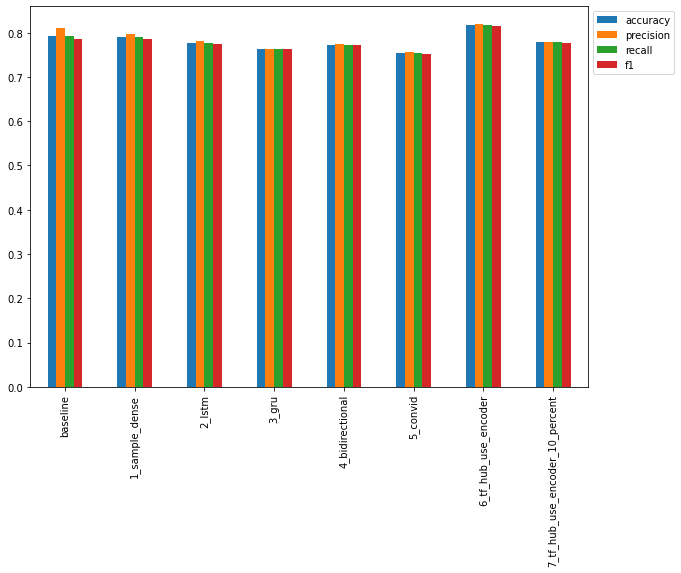

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

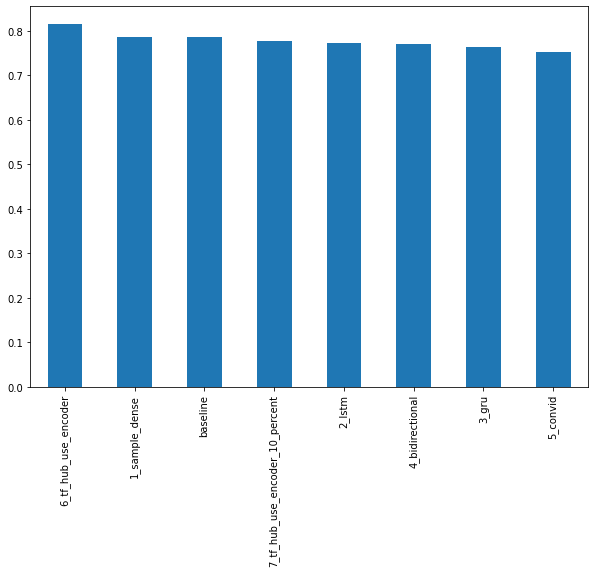

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7))

## Saving and loading a trained model

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

In [ ]:
# Load model with custom Hub Layer (required HDF5 format)
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform ?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4266 - accuracy: 0.8163


[0.42657434940338135, 0.8162729740142822]

In [ ]:
# Save TF Hub Sentence Encoder model to SaveModel format (default)
model_6.save("model_6_SavedModel_format")

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


In [ ]:
# Load in a model model from the SaveModel format
loaded_model_6_savemodel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
# Evaluate model in SavedModel format
loaded_model_6_savemodel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4266 - accuracy: 0.8163


[0.42657434940338135, 0.8162729740142822]

## Finding the most wrong examples

In [ ]:
# Download a pretrained model from Google storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2021-12-06 09:52:04--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  58.2MB/s    in 12s     

2021-12-06 09:52:17 (74.2 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables

In [ ]:
# Import model
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [ ]:
# Make predictions
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create DataFrame with validation sentences, validation labels and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})

val_df.head()


,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Find the wrong predictions and sort by predictions probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)

In [ ]:
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [ ]:
most_wrong.tail()

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [ ]:
# Check the false positive (model predicted 1 when should've been 0)

for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("--------\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

--------

Target: 0, Pred: 1.0, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

--------

Target: 0, Pred: 1.0, Prob: 0.8523000478744507
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

--------

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

--------

Target: 0, Pred: 1.0, Prob: 0.8272132277488708
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

--------

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all ar

In [ ]:
# Check the false negative (model predicted 0 when should've been 1)

for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("--------\n")

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

--------

Target: 1, Pred: 0.0, Prob: 0.05507579818367958
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

--------

Target: 1, Pred: 0.0, Prob: 0.05460338667035103
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

--------

Target: 1, Pred: 0.0, Prob: 0.054597001522779465
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

--------

Target: 1, Pred: 0.0, Prob: 0.04963728412985802
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

--------

Target: 1, Pred: 0.0, Prob: 0.043918490409851074
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

--------

Target

## Making prediction on a test dataset

In [ ]:
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("------\n")

Pred: 0, Prob: 0.09665624052286148
Text:
This whole podcast explosion thing has been weird. Just replied to a YouTube comment for the first time in... Ever. What is happening?!

------

Pred: 0, Prob: 0.12095369398593903
Text:
When you can eat a whole wet burrito and mudslide in 5 minutes. http://t.co/lljzxY8Pc2

------

Pred: 0, Prob: 0.17511890828609467
Text:
SPOILERS: your phone does not have the power to electrocute you if dropped in the bath

------

Pred: 0, Prob: 0.05557030439376831
Text:
@theboysftvines oh my god i SCREAMED WHEN I SAW THIS YESSSS

------

Pred: 0, Prob: 0.10264670103788376
Text:
Raise your words not your voice. It is rain that grows flowers not thunder.

------

Pred: 1, Prob: 0.8866357207298279
Text:
Delhi government to provide free treatment to acid attack victims in private hospitals #AAPatWork http://t.co/xjtp8SBpt3

------

Pred: 0, Prob: 0.40450960397720337
Text:
Displaced

------

Pred: 1, Prob: 0.8084287047386169
Text:
ARSONIST Mc - CHRIST WALK http://t

## The speed/score

In [ ]:
# Let's make a function to measure the time of prediction
import time
def pred_timer(model, samples):
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time / len(samples)
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6_pretrained, val_sentences) 
model_6_total_pred_time, model_6_time_per_pred

(0.25453051399995275, 0.0003340295459316965)

In [ ]:
# Calculate our Baseline model time per pred
model_0_total_pred_time, model_0_time_per_pred = pred_timer(model_0, val_sentences) 
model_0_total_pred_time, model_0_time_per_pred

(0.014686315000062677, 1.9273379265174117e-05)